# 오피스텔_실거래가

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
officetel23 = pd.read_csv('data_yena/오피스텔(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
officetel24 = pd.read_csv('data_yena/오피스텔(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\1406227441.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  officetel24 = pd.read_csv('data_yena/오피스텔(전월세)_실거래가_2024.csv', header=15, encoding='cp949')


In [3]:
officetel23_deal = pd.read_csv('data_yena/오피스텔(매매)_실거래가_2023.csv', header=15, encoding='cp949')
officetel24_deal = pd.read_csv('data_yena/오피스텔(매매)_실거래가_2024.csv', header=15, encoding='cp949')

In [4]:
officetel23_deal.nunique()

NO          8982
시군구          236
번지          1533
본번           692
부번           140
단지명         1582
전용면적(㎡)     2427
계약년월          12
계약일           31
거래금액(만원)    1320
층             50
매수             1
매도             1
건축년도          37
도로명         1501
해제사유발생일      193
거래유형           2
중개사소재지       192
dtype: int64

In [5]:
officetel23['보증금(만원)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 73554 entries, 0 to 73553
Series name: 보증금(만원)
Non-Null Count  Dtype 
--------------  ----- 
73554 non-null  object
dtypes: object(1)
memory usage: 574.8+ KB


In [6]:
officetel23_deal.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,층,건축년도
count,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8854.000000
mean,4491.500000,479.636607,14.776664,31.280880,202306.695391,15.600312,8.736139,2011.765191
std,2593.024392,429.430243,41.239851,18.504105,3.474061,8.402901,5.357279,9.048839
min,1.000000,1.000000,0.000000,9.940000,202301.000000,1.000000,1.000000,1987.000000
25%,2246.250000,104.000000,1.000000,20.680000,202304.000000,8.000000,5.000000,2004.000000
50%,4491.500000,369.000000,4.000000,26.821000,202307.000000,15.000000,8.000000,2014.000000
75%,6736.750000,760.000000,12.000000,34.717500,202310.000000,23.000000,12.000000,2019.000000
max,8982.000000,3001.000000,698.000000,483.960000,202312.000000,31.000000,68.000000,2023.000000


## 전처리

In [58]:
# 전세만 필터링
officetel23_df = officetel23[officetel23['전월세구분']=='전세']
officetel24_df = officetel24[officetel24['전월세구분']=='전세']

In [59]:
# 보증금(만원) 컬럼 타입 변환 (object -> int)
officetel23_df['보증금(만원)'] = officetel23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel23_df['보증금(만원)'] = pd.to_numeric(officetel23_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\2480818449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['보증금(만원)'] = officetel23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_23004\2480818449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['보증금(만원)'] = pd.to_numeric(officetel23_df['보증금(만원)']).astype(int)


In [60]:
officetel24_df['보증금(만원)'] = officetel24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel24_df['보증금(만원)'] = pd.to_numeric(officetel24_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\570142075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['보증금(만원)'] = officetel24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_23004\570142075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['보증금(만원)'] = pd.to_numeric(officetel24_df['보증금(만원)']).astype(int)


In [61]:
# 계약년월 날짜 형식 변환
officetel23_df['계약년월'] = pd.to_datetime(officetel23_df['계약년월'].astype(str), format='%Y%m')
officetel24_df['계약년월'] = pd.to_datetime(officetel24_df['계약년월'].astype(str), format='%Y%m')

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\3387965727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['계약년월'] = pd.to_datetime(officetel23_df['계약년월'].astype(str), format='%Y%m')
C:\Users\emily\AppData\Local\Temp\ipykernel_23004\3387965727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['계약년월'] = pd.to_datetime(officetel24_df['계약년월'].astype(str), format='%Y%m')


In [62]:
# 중복 확인
officetel24_df[officetel24_df.duplicated()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원)


In [63]:
officetel23_df['계약구분'].value_counts()

계약구분
신규    18270
갱신     5695
-      3737
Name: count, dtype: int64

In [64]:
officetel24_df['계약구분'].value_counts()

계약구분
신규    18522
갱신     6266
-       658
Name: count, dtype: int64

In [65]:
officetel23_df[officetel23_df['계약구분']=='-']['종전계약 보증금(만원)']

16       NaN
37       NaN
39       NaN
57       NaN
62       NaN
        ... 
73491    NaN
73495    NaN
73506    NaN
73536    NaN
73540    NaN
Name: 종전계약 보증금(만원), Length: 3737, dtype: object

In [17]:
officetel24_df[officetel24_df['계약구분']=='-']['종전계약 보증금(만원)']

424      NaN
572      NaN
986      NaN
1131     NaN
1235     NaN
        ... 
83902    NaN
83905    NaN
84033    NaN
84069    NaN
84132    NaN
Name: 종전계약 보증금(만원), Length: 658, dtype: object

In [ ]:
# 종전계약 보증금(만원) 결측치 0으로 대체
officetel23_df['종전계약 보증금(만원)'] = officetel23_df['종전계약 보증금(만원)'].fillna(0)

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\2724605101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['종전계약 보증금(만원)'] = officetel23_df['종전계약 보증금(만원)'].fillna(0)


In [67]:
officetel24_df['종전계약 보증금(만원)'] = officetel24_df['종전계약 보증금(만원)'].fillna(0)

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\2697994839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['종전계약 보증금(만원)'] = officetel24_df['종전계약 보증금(만원)'].fillna(0)


In [ ]:
# 계약구분 - 인 경우 보증금(만원)이 존재하지 않으므로 신규로 대체
officetel23_df['계약구분'] = officetel23_df['계약구분'].replace('-', '신규')
officetel23_df['계약구분'].value_counts()

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\1056222888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['계약구분'] = officetel23_df['계약구분'].replace('-', '신규')


계약구분
신규    22007
갱신     5695
Name: count, dtype: int64

In [70]:
officetel24_df['계약구분'] = officetel24_df['계약구분'].replace('-', '신규')
officetel24_df['계약구분'].value_counts()

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\2104723435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['계약구분'] = officetel24_df['계약구분'].replace('-', '신규')


계약구분
신규    19180
갱신     6266
Name: count, dtype: int64

<Axes: ylabel='count'>

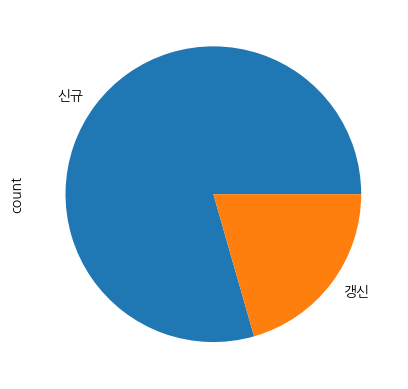

In [19]:
officetel23_df['계약구분'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

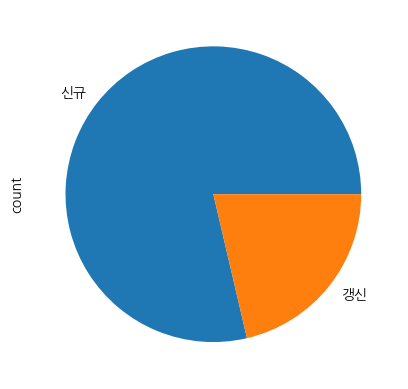

In [21]:
officetel24_df['계약구분'].value_counts().plot(kind='pie')

In [77]:
officetel23_df['계약구분'].value_counts()

계약구분
신규    22007
갱신     5695
Name: count, dtype: int64

In [79]:
officetel23_df[(officetel23_df['계약구분']=='신규')&(officetel23_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원)


In [72]:
officetel24_df[(officetel24_df['계약구분']=='신규')&(officetel24_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원)


## 보증금 분포 비교

In [23]:
officetel23_df['보증금(만원)'].describe()

count     27702.000000
mean      22075.638546
std       10189.541282
min        2500.000000
25%       16400.000000
50%       20000.000000
75%       25200.000000
max      210000.000000
Name: 보증금(만원), dtype: float64

In [24]:
officetel24_df['보증금(만원)'].describe()

count     25446.000000
mean      24730.431856
std       13811.925370
min        1500.000000
25%       17000.000000
50%       22500.000000
75%       28780.000000
max      540000.000000
Name: 보증금(만원), dtype: float64

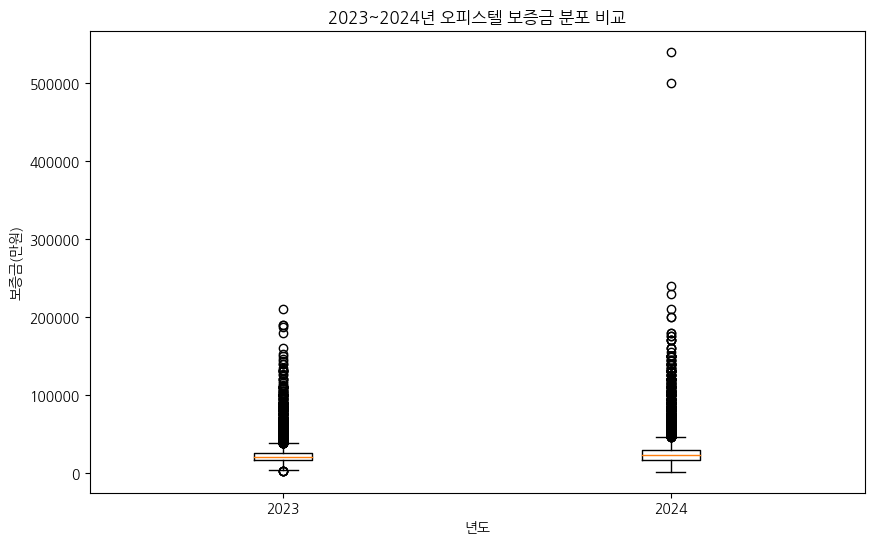

In [25]:
data = [
    officetel23_df['보증금(만원)'],
    officetel24_df['보증금(만원)']
]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=['2023', '2024']) 

plt.title('2023~2024년 오피스텔 보증금 분포 비교')
plt.ylabel('보증금(만원)')
plt.xlabel('년도')

plt.show()

In [26]:
officetel23_df['구'] = officetel23_df['시군구'].str.extract(r'(\S+구)')
officetel23_df

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\3310930576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['구'] = officetel23_df['시군구'].str.extract(r'(\S+구)')


,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),구
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,2023-12-01,30,...,0,11,2015.0,천호대로 257,202401~202601,갱신,-,"3,000",45.0,동대문구
5,6,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,2023-12-01,30,...,0,6,2019.0,도봉로136길 19,202401~202601,신규,-,NaN,NaN,도봉구
6,7,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,27.79,2023-12-01,30,...,0,17,2021.0,용마산로 636,202312~202512,갱신,-,"18,000",0.0,중랑구
13,14,서울특별시 동대문구 전농동,620-15,620,15,청량리역 우남SL타워300,전세,18.43,2023-12-01,30,...,0,18,2023.0,왕산로 186,202401~202601,신규,-,NaN,NaN,동대문구
16,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,2023-12-01,30,...,0,3,2019.0,도봉로136길 19,-,신규,-,NaN,NaN,도봉구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73540,73541,서울특별시 금천구 독산동,1150,1150,0,금천 롯데캐슬 골드파크 2차,전세,27.03,2023-01-01,2,...,0,10,2017.0,,-,신규,-,NaN,NaN,금천구
73546,73547,서울특별시 관악구 봉천동,866-6,866,6,덕산스테이트,전세,19.14,2023-01-01,1,...,0,11,2017.0,관악로13길 16,202301~202501,신규,-,NaN,NaN,관악구
73550,73551,서울특별시 마포구 공덕동,17-67,17,67,헤이븐 오피스텔,전세,20.36,2023-01-01,1,...,0,6,2020.0,만리재로 99,202301~202401,신규,-,NaN,NaN,마포구
73551,73552,서울특별시 강서구 가양동,250-2,250,2,다솔씨티하임,전세,36.69,2023-01-01,1,...,0,4,2018.0,양천로49길 47,202303~202503,신규,-,NaN,NaN,강서구


In [27]:
officetel24_df['구'] = officetel24_df['시군구'].str.extract(r'(\S+구)')
officetel24_df

C:\Users\emily\AppData\Local\Temp\ipykernel_23004\988446480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['구'] = officetel24_df['시군구'].str.extract(r'(\S+구)')


,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),구
4,5,서울특별시 종로구 숭인동,1392-1,1392,1,종로 아인스빌,전세,17.88,2024-12-01,30,...,0,7,2013.0,난계로29가길 19,202502~202602,갱신,-,"14,700",0.0,종로구
9,10,서울특별시 중구 오장동,148-16,148,16,남산 센트럴시티 투웨니퍼스트,전세,18.39,2024-12-01,30,...,0,15,2022.0,마른내로 115-1,202501~202701,NaN,-,NaN,NaN,중구
12,13,서울특별시 성동구 상왕십리동,750,750,0,노블리안,전세,30.81,2024-12-01,30,...,0,9,2003.0,왕십리로 390,202503~202703,NaN,사용,"16,500",0.0,성동구
19,20,서울특별시 종로구 숭인동,1368,1368,0,숭인한성아펠시티,전세,21.45,2024-12-01,30,...,0,17,2021.0,난계로 257,202502~202702,NaN,-,NaN,NaN,종로구
32,33,서울특별시 성북구 석관동,343-2,343,2,filif,전세,29.98,2024-12-01,30,...,0,9,2024.0,화랑로 230,202502~202702,NaN,-,NaN,NaN,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84138,84139,서울특별시 은평구 응암동,599-38,599,38,위산엘리시움,전세,33.85,2024-01-01,1,...,0,5,2021.0,응암로11길 8,202401~202501,NaN,-,"25,300",0.0,은평구
84142,84143,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,29.90,2024-01-01,1,...,0,20,2021.0,용마산로 636,202401~202601,NaN,-,NaN,NaN,중랑구
84145,84146,서울특별시 성북구 동선동1가,85-65,85,65,.,전세,17.72,2024-01-01,1,...,0,3,2013.0,동소문로24길 36,202401~202601,NaN,-,"8,000",0.0,성북구
84150,84151,서울특별시 중구 중림동,363,363,0,쌍용 더 플래티넘 서울역,전세,17.25,2024-01-01,1,...,0,11,2023.0,청파로 454,202402~202602,NaN,-,NaN,NaN,중구


## 자치구별 평균 전세 보증금

In [28]:
officetel23_df.groupby('구')['보증금(만원)'].mean()

구
강남구     24733.659919
강동구     19498.711499
강북구     17835.459184
강서구     19423.196452
관악구     17377.629508
광진구     22543.340591
구로구     20804.257409
금천구     18216.876674
노원구     19191.074074
도봉구     18617.785582
동대문구    19300.580940
동작구     22240.684444
마포구     20823.967051
서대문구    21224.658933
서초구     23314.389988
성동구     21316.939560
성북구     16853.940397
송파구     24532.251008
양천구     36094.184162
영등포구    25469.530418
용산구     29120.128205
은평구     17890.193638
종로구     22514.836028
중구      24079.219660
중랑구     21000.953398
Name: 보증금(만원), dtype: float64

<Axes: ylabel='구'>

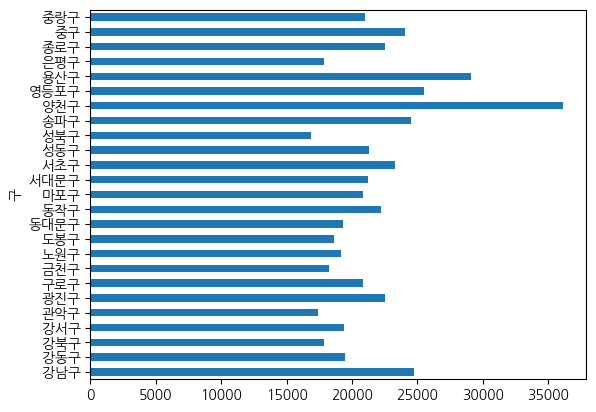

In [29]:
officetel23_df.groupby('구')['보증금(만원)'].mean().plot(kind='barh')

<Axes: ylabel='구'>

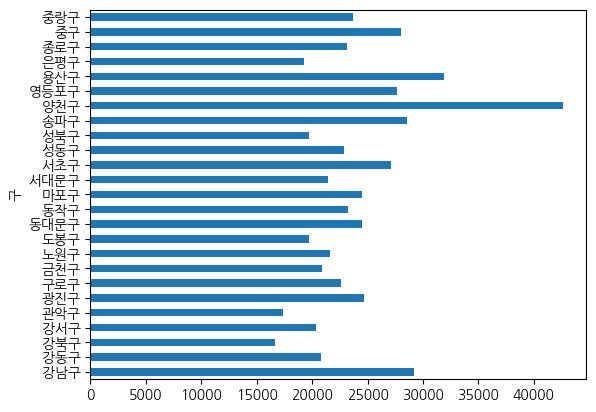

In [30]:
officetel24_df.groupby('구')['보증금(만원)'].mean().plot(kind='barh')

## 건축년도별 보증금 변화 추이

<Axes: xlabel='건축년도'>

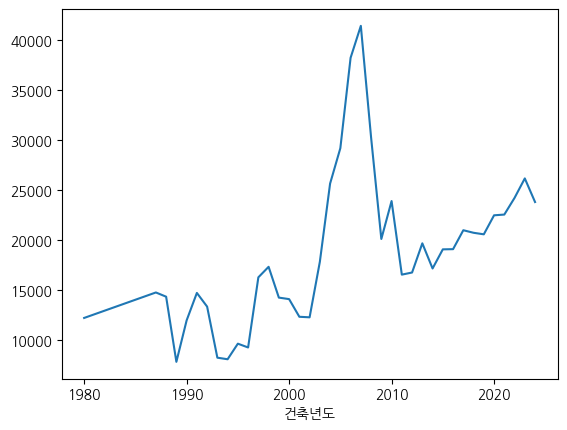

In [31]:
officetel23_df.groupby('건축년도')['보증금(만원)'].mean().plot()

<Axes: xlabel='건축년도'>

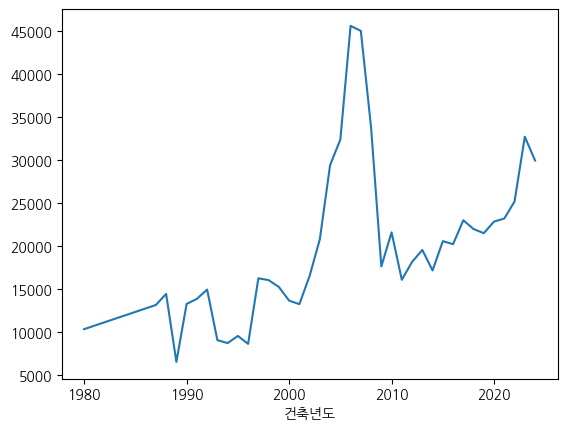

In [32]:
officetel24_df.groupby('건축년도')['보증금(만원)'].mean().plot()

## 보증금 상관관계

In [33]:
deposit_count = officetel23_df['보증금(만원)'].value_counts().reset_index(name='거래건수')
deposit_count

,보증금(만원),거래건수
0,20000,1331
1,22000,921
2,25000,851
3,18000,845
4,21000,787
...,...,...
1489,38588,1
1490,52400,1
1491,23152,1
1492,38287,1


In [34]:
deposit_count['보증금(만원)'].corr(deposit_count['거래건수'])

-0.03957492655074966

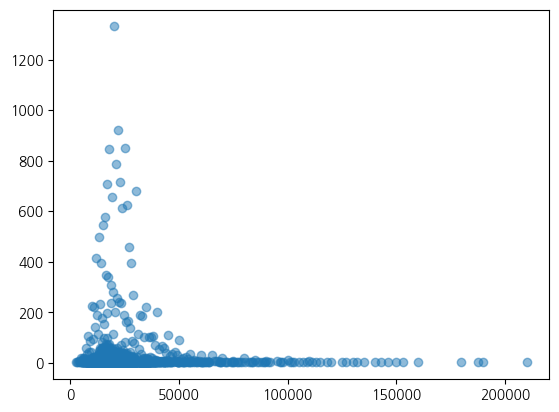

In [35]:
plt.scatter(deposit_count['보증금(만원)'],deposit_count['거래건수'], alpha=0.5)

In [36]:
officetel23_df['보증금(만원)'].corr(officetel23_df['건축년도'])

-0.0027958093971474983

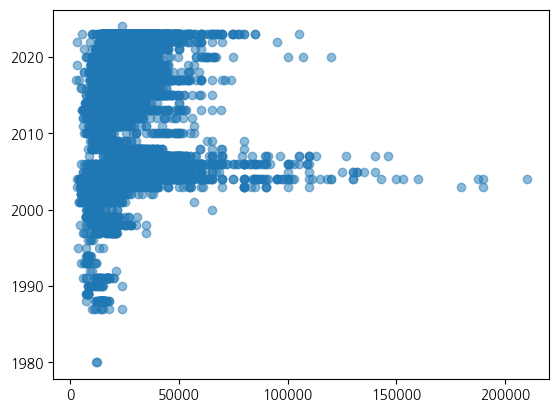

In [37]:
plt.scatter(officetel23_df['보증금(만원)'],officetel23_df['건축년도'], alpha=0.5)

#### 보증금과 전용면적간의 상관관계

In [38]:
officetel23_df['보증금(만원)'].corr(officetel23_df['전용면적(㎡)'])

0.7628024322704534

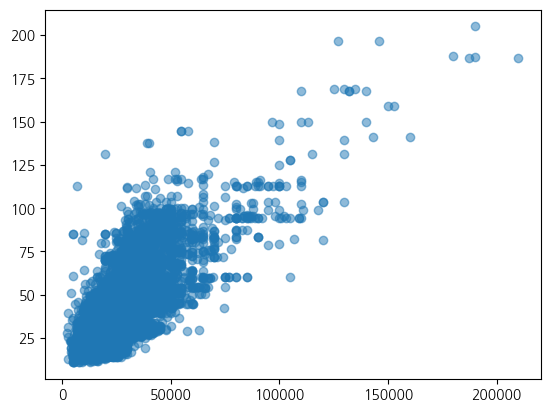

In [39]:
plt.scatter(officetel23_df['보증금(만원)'],officetel23_df['전용면적(㎡)'], alpha=0.5)

## 자치구별 거래 건수 집계

In [40]:
officetel23_df['구'].value_counts()

구
강서구     4622
영등포구    4093
송파구     2729
금천구     1792
동대문구    1532
강남구     1482
마포구     1214
구로구     1181
강동구      974
서초구      859
중구       824
성동구      728
은평구      723
광진구      643
용산구      624
관악구      610
양천구      543
도봉구      541
중랑구      515
종로구      433
서대문구     431
동작구      225
성북구      151
노원구      135
강북구       98
Name: count, dtype: int64

In [41]:
officetel24_df['구'].value_counts()

구
영등포구    3962
강서구     3693
송파구     2090
금천구     1902
동대문구    1414
강남구     1121
구로구     1044
마포구     1014
중구      1000
강동구      829
중랑구      800
서초구      776
은평구      760
용산구      753
양천구      646
관악구      597
성동구      585
광진구      530
종로구      496
도봉구      444
서대문구     358
동작구      231
성북구      178
강북구      119
노원구      104
Name: count, dtype: int64

In [42]:
# 구별 거래건수 집계
gu_counts_23 = officetel23_df['구'].value_counts()
gu_counts_24 = officetel24_df['구'].value_counts()

# 합치기 후 결측값 처리 및 정수형 변환
combined = gu_counts_23.add(gu_counts_24, fill_value=0).astype(int)

# 시리즈 → 데이터프레임 변환
combined_df = combined.reset_index()
combined_df.columns = ['구', '거래건수']

# 거래건수 기준 정렬
combined_df = combined_df.sort_values(by='거래건수', ascending=False)

# 결과 출력
combined_df

,구,거래건수
3,강서구,8315
19,영등포구,8055
17,송파구,4819
7,금천구,3694
10,동대문구,2946
0,강남구,2603
12,마포구,2228
6,구로구,2225
23,중구,1824
1,강동구,1803


In [43]:
seoul_map = pd.read_excel('D:/SDC_project/data_yena/서울시_행정동_좌표.xlsx')
seoul_map

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [44]:
seoul_map = seoul_map.rename(columns={'gu':'구','dong':'동','lat':'위도','lng':'경도'})
seoul_map

,code,sido,구,동,위도,경도
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [45]:
gu_coords_df = seoul_map[['구','위도','경도']]
combined_with_coords = pd.merge(combined_df, gu_coords_df, on=['구'], how='left')
combined_with_coords

,구,거래건수,위도,경도
0,강서구,8315,37.554552,126.871764
1,강서구,8315,37.550968,126.849614
2,강서구,8315,37.550968,126.849614
3,강서구,8315,37.550968,126.849614
4,강서구,8315,37.550968,126.849614
...,...,...,...,...
886,강북구,217,37.641485,127.010591
887,강북구,217,37.621298,127.024902
888,강북구,217,37.635123,127.032072
889,강북구,217,37.639388,127.017183


In [46]:
combined_with_coords.to_csv('combined_coords_officetel.csv')

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

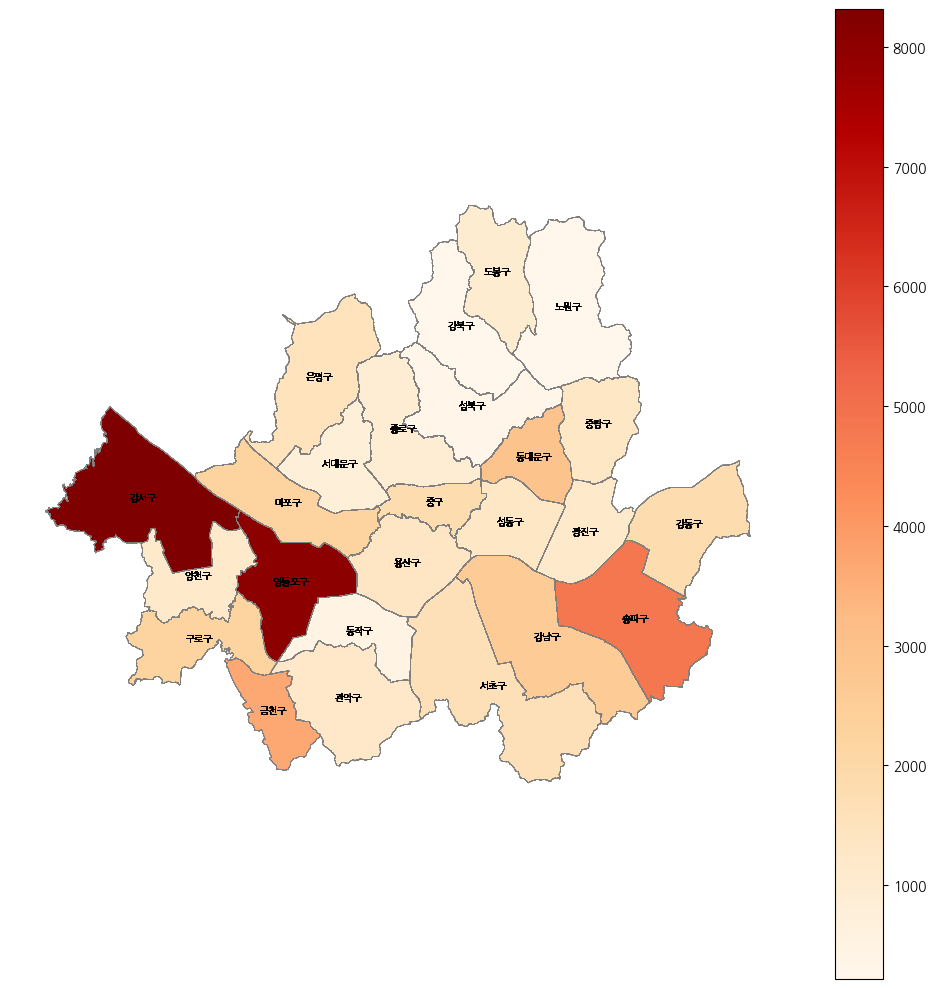

In [48]:
df = pd.read_csv('D:/SDC_project/combined_coords_officetel.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/data_yena/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
plt.savefig('seoul_officetel_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()